In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.model_selection import StratifiedKFold, ParameterGrid

from utils.base_set import X_train, y_train, seed
from utils.cross_validation import cross_validate
import utils.metrics as metrics
from utils.estimators import DecisionTreeWrapper

In [2]:
# ej. 2.1
simple_model = DecisionTreeWrapper(max_depth=3, random_state=seed)

auprc


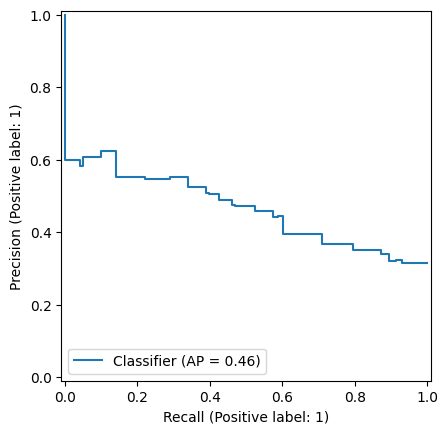

aucroc


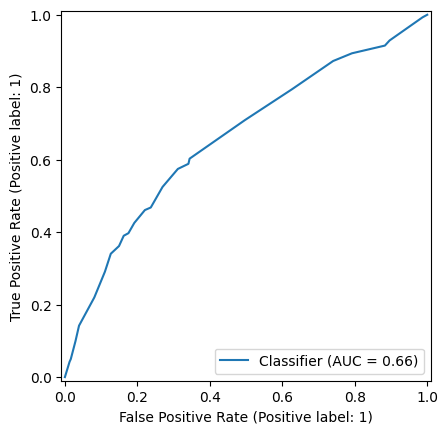

,mean_val,mean_train,tot_val,split_val_0,split_val_1,split_val_2,split_val_3,split_val_4,split_train_0,split_train_1,split_train_2,split_train_3,split_train_4
accuracy,0.690512,0.820720,0.690423,0.733333,0.655556,0.633333,0.700000,0.730337,0.832869,0.818942,0.824513,0.818942,0.808333
auprc,0.486581,0.767063,0.480965,0.501879,0.354457,0.560316,0.457227,0.559025,0.767635,0.761756,0.768877,0.755060,0.781986
aucroc,0.641391,0.819662,0.658964,0.627016,0.634217,0.669931,0.622103,0.653689,0.786909,0.810256,0.846014,0.788968,0.866164


In [3]:
# ej. 2.2
k = 5
mxp = [
    (metrics.accuracy, None, False), 
    (metrics.auprc, PrecisionRecallDisplay, True), 
    (metrics.aucroc, RocCurveDisplay, True)
]
res = []
for metric, plotter, use_decision in mxp:
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)
    data, y_prob = cross_validate(simple_model, X_train, y_train, metric, use_decision, cv)
    res.append(data)
    if plotter:
        print(metric.__name__)
        plotter.from_predictions(y_train, y_prob)
        plt.show()
df = pd.concat(res)
df

In [4]:
# ej. 2.3
k = 5
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)
grid = {
    "random_state": [seed],
    "max_depth": [3, 5, None],
    "criterion": ["gini", "entropy"],
}
keys = grid.keys()
res = []
for hs in ParameterGrid(grid):
    model = DecisionTreeWrapper(**hs)
    data, _ = cross_validate(model, X_train, y_train, metrics.accuracy, False, cv)
    res.append([hs[x] for x in keys]+[data.mean_train.accuracy, data.mean_val.accuracy])
df = pd.DataFrame(
    res,
    columns=list(keys)+["accuracy_train", "accuracy_val"]
)
df

,random_state,max_depth,criterion,accuracy_train,accuracy_val
0,8241,3.0,gini,0.820720,0.690512
1,8241,5.0,gini,0.912567,0.712684
2,8241,NaN,gini,1.000000,0.663720
3,8241,3.0,entropy,0.788983,0.681498
4,8241,5.0,entropy,0.893655,0.650312
5,8241,NaN,entropy,1.000000,0.645918
